# Cleaning Tecnhinques to the dataset
- remove duplicated urls
- filter columns
- fix the erorr values in label column <manulally> 
- check inconsistent and nonreasonable values
- check if there is any empty value in the analysed attributes

In [ ]:
# remove duplicated urls

import pandas as pd

# Assuming `df` is your original DataFrame containing URLs
# Assuming you already filtered out the duplicate URLs and stored them in `duplicate_urls`

import pandas as pd
import csv
from scipy import stats

df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset_cleaned.csv')
selected_columns = df[['NoOfObfuscatedChar', 'NoOfAmpersandInURL', 'NoOfQMarkInURL', 'NoOfEqualsInURL', 
                       'HasTitle', 'HasFavicon', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 
                       'HasPasswordField', 'HasCopyrightInfo', 'URLSimilarityIndex', 'label', 'URL']]

# Filter out duplicate URLs
duplicate_urls = selected_columns[selected_columns.duplicated(subset='URL', keep=False)]

# Drop duplicate URLs - keeping the first occurrence
remaining_urls = selected_columns.drop_duplicates(subset='URL', keep=False)


print("Number of duplicate URLs: ", duplicate_urls.shape[0])
print("Number of remaining URLs: ", remaining_urls.shape[0])
print("Number of original URLs: ", df.shape[0])

# Define the file path for the new CSV file
output_file_path = "remaining_cleaned_urls.csv"

# Save the remaining URLs to a new CSV file
remaining_urls.to_csv(output_file_path, index=False)

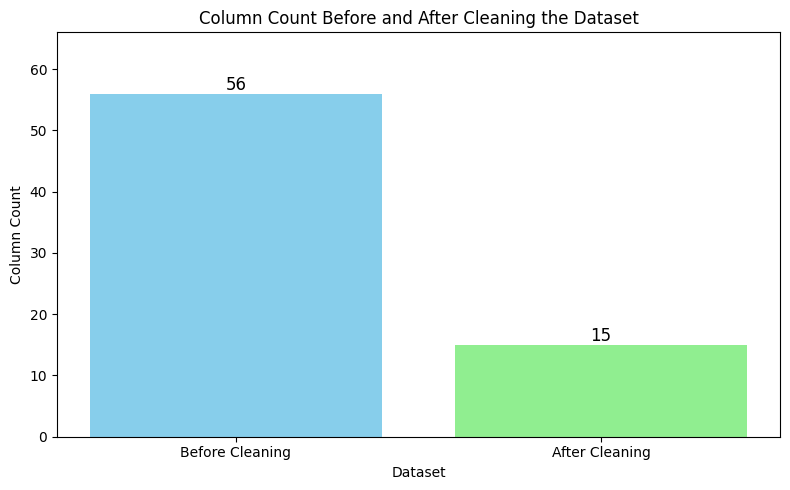

In [3]:
# filter columns
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data_before_cleaning = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset_cleaned.csv')
data_after_cleaning = pd.read_csv('remaining_cleaned_urls.csv')

# Count the total number of columns before and after cleaning
count_before_cleaning = len(data_before_cleaning.columns)
count_after_cleaning = len(data_after_cleaning.columns)

# Prepare data for plotting
count_data = {'Dataset': ['Before Cleaning', 'After Cleaning'],
              'Column Count': [count_before_cleaning, count_after_cleaning]}

# Convert to DataFrame for visualization
count_df = pd.DataFrame(count_data)

# Plot the counts using bar plots
plt.figure(figsize=(8, 5))
bars = plt.bar(count_df['Dataset'], count_df['Column Count'], color=['skyblue', 'lightgreen'])

# Add text labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=12, color='black')

plt.title('Column Count Before and After Cleaning the Dataset')
plt.xlabel('Dataset')
plt.ylabel('Column Count')
plt.ylim(0, max(count_before_cleaning, count_after_cleaning) + 10)  # Adjust y-axis limit for better visualization

plt.tight_layout()
plt.show()


In [ ]:
# check inconsistent and nonreasonable values
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the cleaned data
remaining_urls = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset_cleaned.csv')

# Select the required columns and the label column
selected_columns = remaining_urls[['NoOfObfuscatedChar', 'NoOfLettersInURL', 'NoOfDegitsInURL', 
                                   'NoOfAmpersandInURL', 'NoOfQMarkInURL', 'NoOfEqualsInURL', 
                                   'NoOfOtherSpecialCharsInURL', 'label', 'URL']]

unreasonable_values = selected_columns[(selected_columns['NoOfObfuscatedChar'] > selected_columns['URL'].str.len()) |
                         (selected_columns['NoOfLettersInURL'] > selected_columns['URL'].str.len()) |
                         (selected_columns['NoOfDegitsInURL'] > selected_columns['URL'].str.len()) |
                         (selected_columns['NoOfAmpersandInURL'] > selected_columns['URL'].str.len()) |
                         (selected_columns['NoOfQMarkInURL'] > selected_columns['URL'].str.len()) |
                         (selected_columns['NoOfEqualsInURL'] > selected_columns['URL'].str.len()) |
                         (selected_columns['NoOfOtherSpecialCharsInURL'] > selected_columns['URL'].str.len())]

display(unreasonable_values)
inconsistent_rows = selected_columns[(selected_columns['NoOfObfuscatedChar'] < 0) |
                       (selected_columns['NoOfLettersInURL'] < 0) |
                       (selected_columns['NoOfDegitsInURL'] < 0) |
                       (selected_columns['NoOfAmpersandInURL'] < 0) |
                       (selected_columns['NoOfQMarkInURL'] < 0) |
                       (selected_columns['NoOfEqualsInURL'] < 0) |
                       (selected_columns['NoOfOtherSpecialCharsInURL'] < 0)]

display(inconsistent_rows)


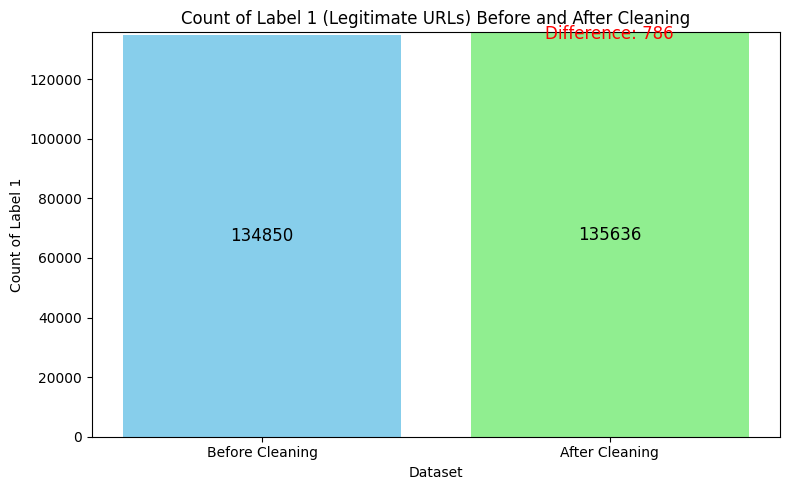

In [7]:
# fix the erorr values in label column <manulally> 
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data_before_cleaning = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
data_after_cleaning = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset_cleaned.csv')

# Count the number of records with label = 1 before and after cleaning
count_label_1_before = data_before_cleaning[data_before_cleaning['label'] == 1].shape[0]
count_label_1_after = data_after_cleaning[data_after_cleaning['label'] == 1].shape[0]

# Prepare data for plotting
count_data = {'Dataset': ['Before Cleaning', 'After Cleaning'],
              'Count of Label 1': [count_label_1_before, count_label_1_after]}

# Convert to DataFrame for visualization
count_df = pd.DataFrame(count_data)

# Plot the counts using bar plots
plt.figure(figsize=(8, 5))
bars = plt.bar(count_df['Dataset'], count_df['Count of Label 1'], color=['skyblue', 'lightgreen'])

# Add text labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, int(yval), va='center', ha='center', fontsize=12, color='black')

# Highlight the differences
difference = abs(count_label_1_before - count_label_1_after)
plt.text(1, (count_label_1_before + count_label_1_after) / 2, f'Difference: {difference}', va='center', ha='center', fontsize=12, color='red')

plt.title('Count of Label 1 (Legitimate URLs) Before and After Cleaning')
plt.xlabel('Dataset')
plt.ylabel('Count of Label 1')
plt.ylim(0, max(count_label_1_before, count_label_1_after) + 50)  # Adjust y-axis limit for better visualization

plt.tight_layout()
plt.show()


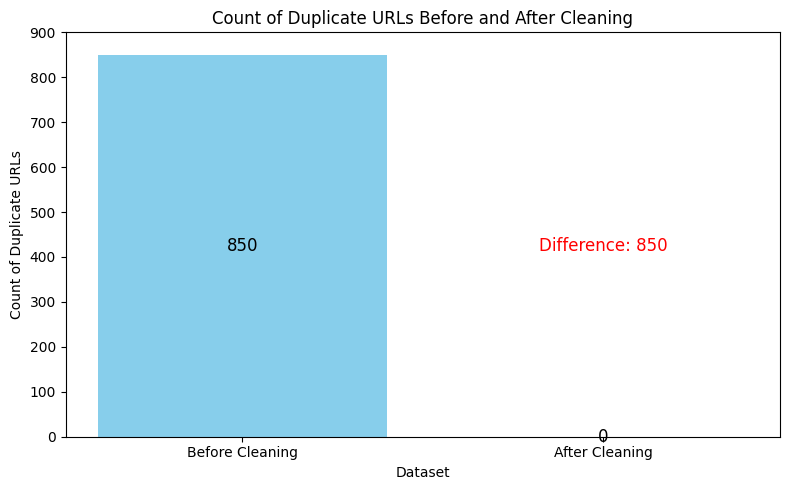

In [10]:
# Analysing attributes after removing duplicates
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data_before_cleaning = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset_cleaned.csv')
data_after_cleaning = pd.read_csv('remaining_cleaned_urls.csv')

# Identify duplicate URLs in each dataset
duplicate_urls_before = data_before_cleaning[data_before_cleaning.duplicated(subset='URL', keep=False)]
duplicate_urls_after = data_after_cleaning[data_after_cleaning.duplicated(subset='URL', keep=False)]

# Count the number of duplicate URLs
count_duplicates_before = duplicate_urls_before.shape[0]
count_duplicates_after = duplicate_urls_after.shape[0]

# Prepare data for plotting
duplicate_data = {'Dataset': ['Before Cleaning', 'After Cleaning'],
                  'Count of Duplicate URLs': [count_duplicates_before, count_duplicates_after]}

# Convert to DataFrame for visualization
duplicate_df = pd.DataFrame(duplicate_data)

# Plot the counts using bar plots
plt.figure(figsize=(8, 5))
bars = plt.bar(duplicate_df['Dataset'], duplicate_df['Count of Duplicate URLs'], color=['skyblue', 'lightgreen'])

# Add text labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, int(yval), va='center', ha='center', fontsize=12, color='black')

# Highlight the differences
difference = abs(count_duplicates_before - count_duplicates_after)
plt.text(1, (count_duplicates_before + count_duplicates_after) / 2, f'Difference: {difference}', va='center', ha='center', fontsize=12, color='red')

plt.title('Count of Duplicate URLs Before and After Cleaning')
plt.xlabel('Dataset')
plt.ylabel('Count of Duplicate URLs')
plt.ylim(0, max(count_duplicates_before, count_duplicates_after) + 50)  # Adjust y-axis limit for better visualization

plt.tight_layout()
plt.show()


,Column,Counts_Before_Cleaning,Counts_After_Cleaning,Difference
0,NoOfObfuscatedChar,5862,5850,12
1,NoOfAmpersandInURL,5908,5898,10
2,NoOfQMarkInURL,6933,6917,16
3,NoOfEqualsInURL,14676,14664,12


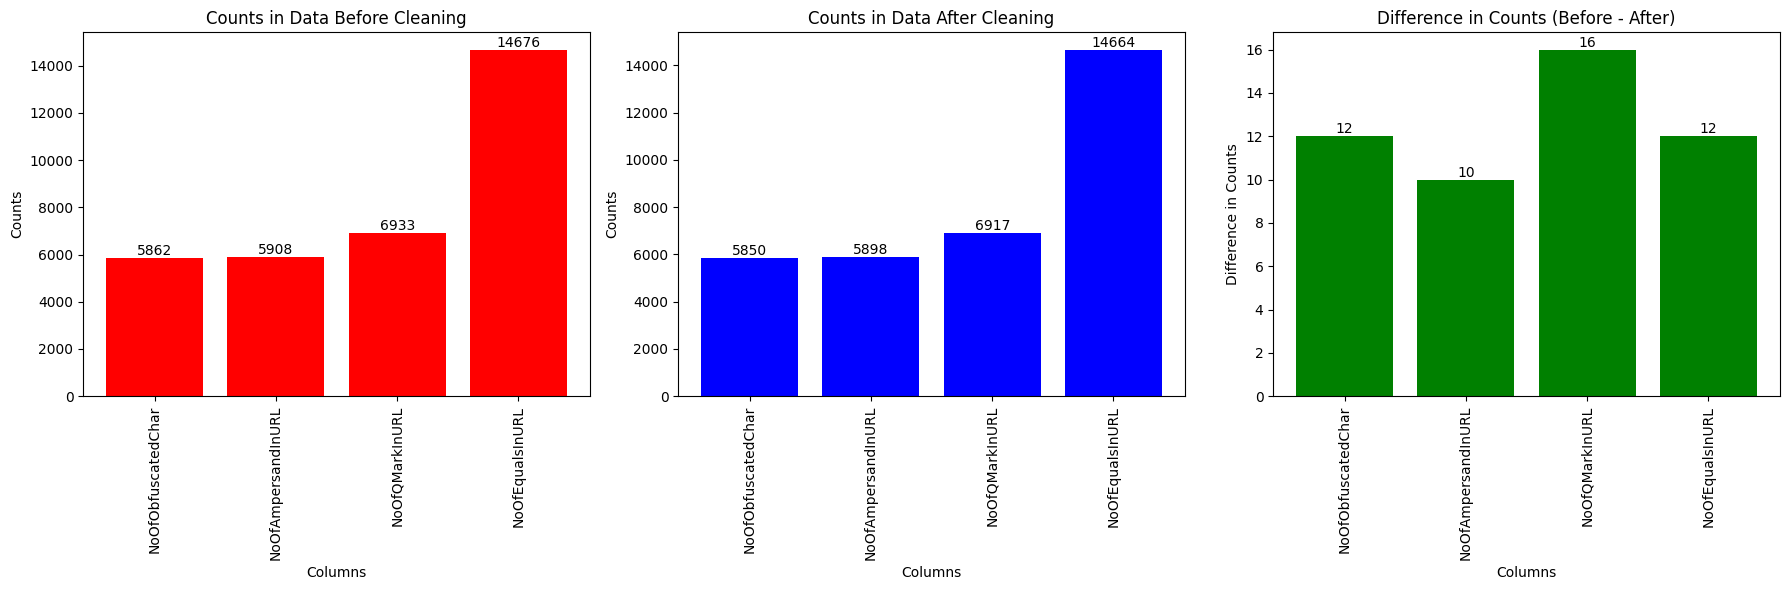

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data_before_cleaning = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset_cleaned.csv')
data_after_cleaning = pd.read_csv('remaining_cleaned_urls.csv')

# Define the columns of interest
columns_of_interest = [
    'NoOfObfuscatedChar', 'NoOfAmpersandInURL', 'NoOfQMarkInURL', 'NoOfEqualsInURL'
  
]

# Function to calculate attribute counts
def calculate_attribute_counts(data, columns):
    counts = {}
    for column in columns:
        if data[column].dtype == 'bool':
            counts[column] = data[column].sum()
        else:
            counts[column] = data[column].sum()
    return counts

# Calculate counts for data before and after cleaning
counts_before_cleaning = calculate_attribute_counts(data_before_cleaning, columns_of_interest)
counts_after_cleaning = calculate_attribute_counts(data_after_cleaning, columns_of_interest)

# Convert counts to DataFrame
counts_before_df = pd.DataFrame(list(counts_before_cleaning.items()), columns=['Column', 'Counts_Before_Cleaning'])
counts_after_df = pd.DataFrame(list(counts_after_cleaning.items()), columns=['Column', 'Counts_After_Cleaning'])

# Merge the two DataFrames for comparison and calculate differences
counts_comparison_df = pd.merge(counts_before_df, counts_after_df, on='Column')
counts_comparison_df['Difference'] = counts_comparison_df['Counts_Before_Cleaning'] - counts_comparison_df['Counts_After_Cleaning']
display(counts_comparison_df)

# Plotting the counts
plt.figure(figsize=(18, 6))

# Plot for data before cleaning
plt.subplot(1, 3, 1)
bars_before = plt.bar(counts_comparison_df['Column'], counts_comparison_df['Counts_Before_Cleaning'], color='red')
plt.xlabel('Columns')
plt.ylabel('Counts')
plt.title('Counts in Data Before Cleaning')
plt.xticks(rotation=90)
for bar in bars_before:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

# Plot for data after cleaning
plt.subplot(1, 3, 2)
bars_after = plt.bar(counts_comparison_df['Column'], counts_comparison_df['Counts_After_Cleaning'], color='blue')
plt.xlabel('Columns')
plt.ylabel('Counts')
plt.title('Counts in Data After Cleaning')
plt.xticks(rotation=90)
for bar in bars_after:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

# Plot for differences in counts
plt.subplot(1, 3, 3)
bars_diff = plt.bar(counts_comparison_df['Column'], counts_comparison_df['Difference'], color='green')
plt.xlabel('Columns')
plt.ylabel('Difference in Counts')
plt.title('Difference in Counts (Before - After)')
plt.xticks(rotation=90)
for bar in bars_diff:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


,Column,Counts_Before_Cleaning,Counts_After_Cleaning,Difference
0,HasTitle,2.030810e+05,2.024410e+05,640.000000
1,HasFavicon,8.530300e+04,8.519700e+04,106.000000
2,HasExternalFormSubmit,1.037200e+04,1.036800e+04,4.000000
3,HasSocialNet,1.076570e+05,1.076570e+05,0.000000
4,HasSubmitButton,9.769000e+04,9.751900e+04,171.000000
5,HasHiddenFields,8.908300e+04,8.895600e+04,127.000000
6,HasPasswordField,2.411300e+04,2.395800e+04,155.000000
7,HasCopyrightInfo,1.147790e+05,1.147130e+05,66.000000
8,URLSimilarityIndex,1.849359e+07,1.845834e+07,35242.673121
9,label,1.356360e+05,1.356360e+05,0.000000


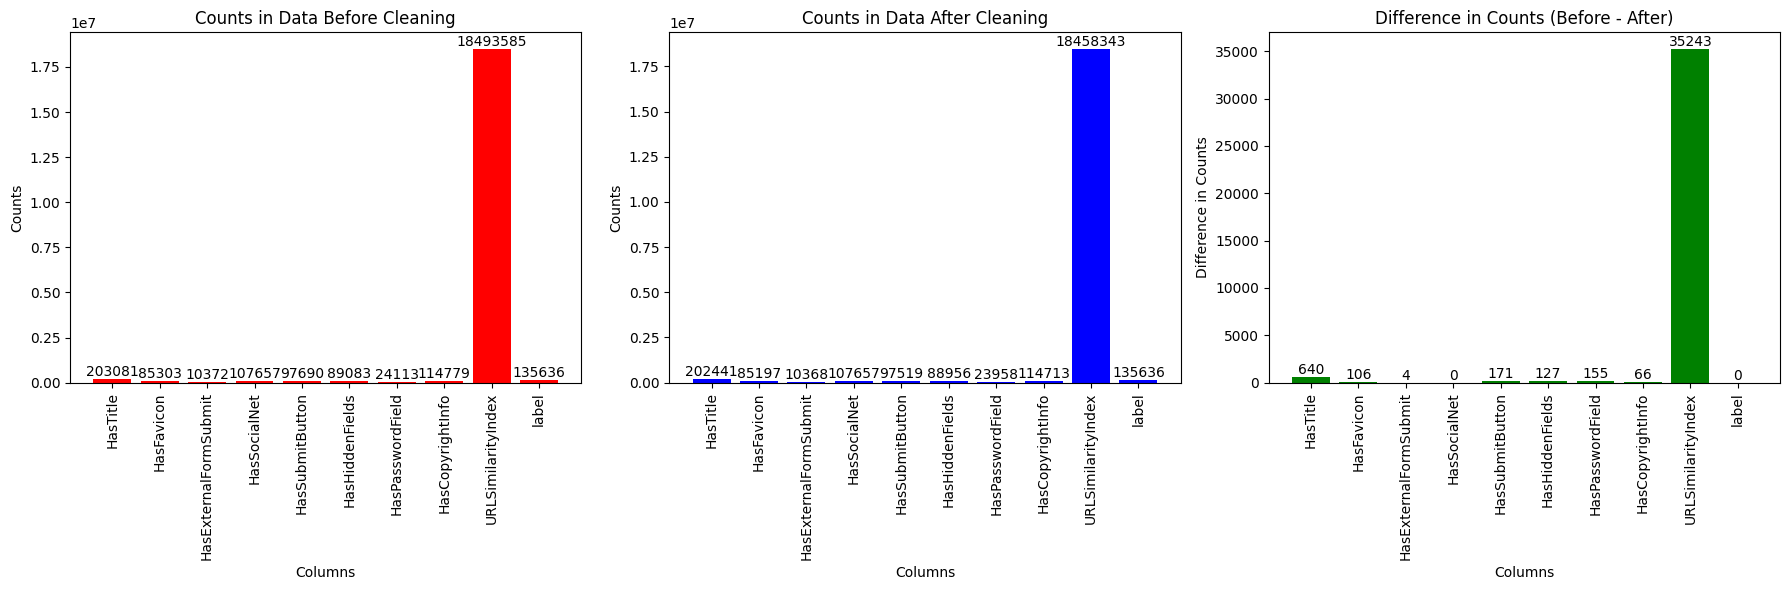

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data_before_cleaning = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset_cleaned.csv')
data_after_cleaning = pd.read_csv('remaining_cleaned_urls.csv')

# Define the columns of interest
columns_of_interest = [
    'HasTitle', 'HasFavicon', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
    'HasHiddenFields', 'HasPasswordField', 'HasCopyrightInfo', 'URLSimilarityIndex', 'label'
  
]

# Function to calculate attribute counts
def calculate_attribute_counts(data, columns):
    counts = {}
    for column in columns:
        if data[column].dtype == 'bool':
            counts[column] = data[column].sum()
        else:
            counts[column] = data[column].sum()
    return counts

# Calculate counts for data before and after cleaning
counts_before_cleaning = calculate_attribute_counts(data_before_cleaning, columns_of_interest)
counts_after_cleaning = calculate_attribute_counts(data_after_cleaning, columns_of_interest)

# Convert counts to DataFrame
counts_before_df = pd.DataFrame(list(counts_before_cleaning.items()), columns=['Column', 'Counts_Before_Cleaning'])
counts_after_df = pd.DataFrame(list(counts_after_cleaning.items()), columns=['Column', 'Counts_After_Cleaning'])

# Merge the two DataFrames for comparison and calculate differences
counts_comparison_df = pd.merge(counts_before_df, counts_after_df, on='Column')
counts_comparison_df['Difference'] = counts_comparison_df['Counts_Before_Cleaning'] - counts_comparison_df['Counts_After_Cleaning']
display(counts_comparison_df)

# Plotting the counts
plt.figure(figsize=(18, 6))

# Plot for data before cleaning
plt.subplot(1, 3, 1)
bars_before = plt.bar(counts_comparison_df['Column'], counts_comparison_df['Counts_Before_Cleaning'], color='red')
plt.xlabel('Columns')
plt.ylabel('Counts')
plt.title('Counts in Data Before Cleaning')
plt.xticks(rotation=90)
for bar in bars_before:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

# Plot for data after cleaning
plt.subplot(1, 3, 2)
bars_after = plt.bar(counts_comparison_df['Column'], counts_comparison_df['Counts_After_Cleaning'], color='blue')
plt.xlabel('Columns')
plt.ylabel('Counts')
plt.title('Counts in Data After Cleaning')
plt.xticks(rotation=90)
for bar in bars_after:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

# Plot for differences in counts
plt.subplot(1, 3, 3)
bars_diff = plt.bar(counts_comparison_df['Column'], counts_comparison_df['Difference'], color='green')
plt.xlabel('Columns')
plt.ylabel('Difference in Counts')
plt.title('Difference in Counts (Before - After)')
plt.xticks(rotation=90)
for bar in bars_diff:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [30]:
# check if there is any empty value in the analysed attributes
import pandas as pd

# Load your dataset
data_after_cleaning = pd.read_csv('remaining_cleaned_urls.csv')

# Define the columns of interest
columns_of_interest = ['NoOfObfuscatedChar', 'NoOfAmpersandInURL', 'NoOfQMarkInURL', 'NoOfEqualsInURL',
    'HasTitle', 'HasFavicon', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
    'HasHiddenFields', 'HasPasswordField', 'HasCopyrightInfo', 'URLSimilarityIndex', 'label'
]

# Check for empty rows in the after cleaning data
empty_rows_after_cleaning = data_after_cleaning[columns_of_interest].isnull().any(axis=1)
if empty_rows_after_cleaning.any():
    print("\nEmpty rows found in after cleaning data:")
    print(data_after_cleaning[empty_rows_after_cleaning])
else:
    print("\nNo empty rows found in after cleaning data.")


No empty rows found in before cleaning data.

No empty rows found in after cleaning data.


In [68]:
# check the data types of the analysed columns
import pandas as pd
import matplotlib.pyplot as plt

# Read the cleaned data
remaining_urls = pd.read_csv('remaining_cleaned_urls.csv')

selected_columns = remaining_urls[['NoOfObfuscatedChar', 'NoOfAmpersandInURL', 'NoOfQMarkInURL', 'NoOfEqualsInURL',
    'HasTitle', 'HasFavicon', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
    'HasHiddenFields', 'HasPasswordField', 'HasCopyrightInfo', 'URLSimilarityIndex', 'label']]

print(selected_columns.dtypes)


NoOfObfuscatedChar         int64
NoOfAmpersandInURL         int64
NoOfQMarkInURL             int64
NoOfEqualsInURL            int64
HasTitle                   int64
HasFavicon                 int64
HasExternalFormSubmit      int64
HasSocialNet               int64
HasSubmitButton            int64
HasHiddenFields            int64
HasPasswordField           int64
HasCopyrightInfo           int64
URLSimilarityIndex       float64
label                      int64
dtype: object


# Data Analysis for the 4 questions

In [ ]:
# What are the common unusual special characters present in phishing URLS compared to legitimate URLs, Specifically, 
#'NoOfObfuscatedChar', 'NoOfAmpersandInURL', 'NoOfQMarkInURL', 'NoOfEqualsInURL'?

import pandas as pd
import matplotlib.pyplot as plt

# Read the cleaned data
remaining_urls = pd.read_csv('remaining_cleaned_urls.csv')

selected_columns = remaining_urls[['NoOfObfuscatedChar', 'NoOfAmpersandInURL', 'NoOfQMarkInURL', 'NoOfEqualsInURL', 'label']]

# Filter to include only phishing URLs (label == 0) and legitimate URLs (label == 1)
phishing_data = selected_columns[selected_columns['label'] == 0]
legitimate_data = selected_columns[selected_columns['label'] == 1]

# Sum the attributes for phishing and legitimate data
phishing_sums = phishing_data[['NoOfObfuscatedChar', 'NoOfAmpersandInURL', 'NoOfQMarkInURL', 'NoOfEqualsInURL']].sum()
legitimate_sums = legitimate_data[['NoOfObfuscatedChar', 'NoOfAmpersandInURL', 'NoOfQMarkInURL', 'NoOfEqualsInURL']].sum()

# Combine sums into a single DataFrame
combined_sums_df = pd.DataFrame({
    'Attribute': phishing_sums.index,
    'Phishing': phishing_sums.values,
    'Legitimate': legitimate_sums.values
})

# Plot the sums in a grouped bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(combined_sums_df))

bars1 = plt.bar(index, combined_sums_df['Phishing'], bar_width, label='Phishing', color='red')
bars2 = plt.bar([i + bar_width for i in index], combined_sums_df['Legitimate'], bar_width, label='Legitimate', color='blue')

# Annotate each bar with the value
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.xlabel('Special Characters Attributes')
plt.ylabel('Sum (count)')
plt.title('Sum of Specified Attributes in Phishing and Legitimate URLs')
plt.xticks([i + bar_width / 2 for i in index], combined_sums_df['Attribute'])
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# What are the most frequently occurring webpage metadata in phishing URLs compared to legitimate URLs , especially in terms of 'HasTitle', 'HasFavicon', 
# 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'HasCopyrightInfo'?
import pandas as pd
import matplotlib.pyplot as plt

# Assuming phishing_data is the DataFrame containing all URLs with the mentioned attributes
phishing_data = pd.read_csv('remaining_cleaned_urls.csv')

# Filter phishing URLs
phishing_urls = phishing_data[phishing_data['label'] == 0]

# Count the occurrences of 0s and 1s for each attribute
attribute_sums = phishing_urls[['HasTitle', 'HasFavicon', 'HasExternalFormSubmit', 'HasSocialNet',
                                'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'HasCopyrightInfo']].apply(pd.Series.value_counts)

# Transpose for easier plotting
attribute_sums = attribute_sums.T

# Plot the stacked bar chart
ax = attribute_sums.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgreen', 'lightcoral'])
plt.xlabel('Webpage Metadata Attributes')
plt.ylabel('Count')
plt.title('Distribution of Each Webpage Metadata in Phishing & Legitimate URLs (After cleaning)')
plt.xticks(rotation=45)

# Add value annotations inside the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

plt.legend(['Legitimate', 'Phishing'], title='Value', loc='upper left')
plt.show()


In [ ]:
# What is the correlation between the presence of the analyzed special characters with URL phishing classification?
import pandas as pd

# Load the dataset
data = pd.read_csv('remaining_cleaned_urls.csv')

# Filter the dataset to include only phishing URLs
phishing_urls = data[data['label'] == 0]

# Select relevant columns
special_char_columns = ['NoOfObfuscatedChar', 'NoOfAmpersandInURL', 'NoOfQMarkInURL', 'NoOfEqualsInURL']

# Calculate the correlation matrix for phishing URLs
correlation_matrix = phishing_urls[special_char_columns].corr()

# Print the correlation matrix
print("Correlation matrix for special characters in phishing URLs (After cleaning):")
display(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation heatmap for Special Characters (After cleaning)')
plt.show()


In [ ]:
# What is the correlation between the analyzed webpage metadata attributes and the likelihood of a URL being classified as a phishing attempt?

import pandas as pd

# Load the dataset
dataset = pd.read_csv('remaining_cleaned_urls.csv')

# Filter the dataset to include only phishing URLs
phishing_urls = dataset[dataset['label'] == 0]

# Select relevant columns
special_char_columns = ['HasTitle', 'HasFavicon', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 
                                   'HasPasswordField', 'HasCopyrightInfo']

# Calculate the correlation matrix for phishing URLs
correlation_matrix = phishing_urls[special_char_columns].corr()

# Print the correlation matrix
print("Correlation matrix for webpage metadata attributes in phishing URLs (After cleaning):")
display(correlation_matrix)

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Webpage Metadata Attributes in Phishing URLs')
plt.show()



# The central moment for the 4 questions >>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

# Load the cleaned data
data = pd.read_csv('remaining_cleaned_urls.csv')

# Define the columns of interest and the label
columns_of_interest = ['NoOfObfuscatedChar', 'NoOfAmpersandInURL', 'NoOfQMarkInURL', 'NoOfEqualsInURL']
label_column = 'label'

# Separate the data into phishing (label == 0) and legitimate (label != 0) URLs
phishing_data = data[data[label_column] == 0]
legitimate_data = data[data[label_column] != 0]

# Function to calculate central moments
def calculate_central_moments(data, columns):
    moments = {}
    for column in columns:
        mean = data[column].mean()
        median = data[column].median()
        std_dev = data[column].std()
        skewness = skew(data[column])
        kurt = kurtosis(data[column])
        moments[column] = {
            'Mean': mean,
            'Median': median,
            'StdDev': std_dev,
            'Skewness': skewness,
            'Kurtosis': kurt
        }
    return moments

# Calculate central moments for phishing and legitimate data
phishing_moments = calculate_central_moments(phishing_data, columns_of_interest)
legitimate_moments = calculate_central_moments(legitimate_data, columns_of_interest)

# Create a DataFrame to display the results
moments_df = pd.DataFrame({
    'Phishing Mean': [phishing_moments[col]['Mean'] for col in columns_of_interest],
    'Phishing Median': [phishing_moments[col]['Median'] for col in columns_of_interest],
    'Phishing StdDev': [phishing_moments[col]['StdDev'] for col in columns_of_interest],
    'Phishing Skewness': [phishing_moments[col]['Skewness'] for col in columns_of_interest],
    'Phishing Kurtosis': [phishing_moments[col]['Kurtosis'] for col in columns_of_interest],
    'Legitimate Mean': [legitimate_moments[col]['Mean'] for col in columns_of_interest],
    'Legitimate Median': [legitimate_moments[col]['Median'] for col in columns_of_interest],
    'Legitimate StdDev': [legitimate_moments[col]['StdDev'] for col in columns_of_interest],
    'Legitimate Skewness': [legitimate_moments[col]['Skewness'] for col in columns_of_interest],
    'Legitimate Kurtosis': [legitimate_moments[col]['Kurtosis'] for col in columns_of_interest]
}, index=columns_of_interest)

display(moments_df)

# Visualization
attributes = columns_of_interest
moment_types = ['Mean', 'Median', 'StdDev', 'Skewness', 'Kurtosis']
bar_width = 0.35

# Plot each moment type in a separate subplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten()

for i, moment in enumerate(moment_types):
    ax = axes[i]
    index = np.arange(len(attributes))
    phishing_values = moments_df[f'Phishing {moment}']
    legitimate_values = moments_df[f'Legitimate {moment}']

    bars1 = ax.bar(index, phishing_values, bar_width, label='Phishing')
    bars2 = ax.bar(index + bar_width, legitimate_values, bar_width, label='Legitimate')

    ax.set_xlabel('Attributes')
    ax.set_ylabel(moment)
    ax.set_title(f'Phishing vs Legitimate - {moment}')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(attributes)
    ax.legend()

    # Annotate bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

# Hide the last subplot (if there are an odd number of plots)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


,Phishing Mean,Phishing Median,Phishing StdDev,Phishing Skewness,Phishing Kurtosis,Legitimate Mean,Legitimate Median,Legitimate StdDev,Legitimate Skewness,Legitimate Kurtosis
HasTitle,0.676082,1.0,0.467972,-0.752535,-1.433690,0.997523,1.0,0.049710,-20.017019,398.681055
HasFavicon,0.087877,0.0,0.283118,2.911332,6.475856,0.563788,1.0,0.495916,-0.257256,-1.933820
HasExternalFormSubmit,0.004300,0.0,0.065431,15.151835,227.578089,0.073292,0.0,0.260616,3.274628,8.723188
HasSocialNet,0.005135,0.0,0.071478,13.846613,189.728691,0.789960,1.0,0.407338,-1.423686,0.026883
HasSubmitButton,0.084504,0.0,0.278143,2.987654,6.926074,0.657104,1.0,0.474679,-0.661942,-1.561833
HasHiddenFields,0.093436,0.0,0.291043,2.793854,5.805620,0.587433,1.0,0.492298,-0.355203,-1.873831
HasPasswordField,0.053157,0.0,0.224348,3.983494,13.868227,0.137714,0.0,0.344601,2.102647,2.421125
HasCopyrightInfo,0.057356,0.0,0.232523,3.807324,12.495713,0.803747,1.0,0.397164,-1.529585,0.339631


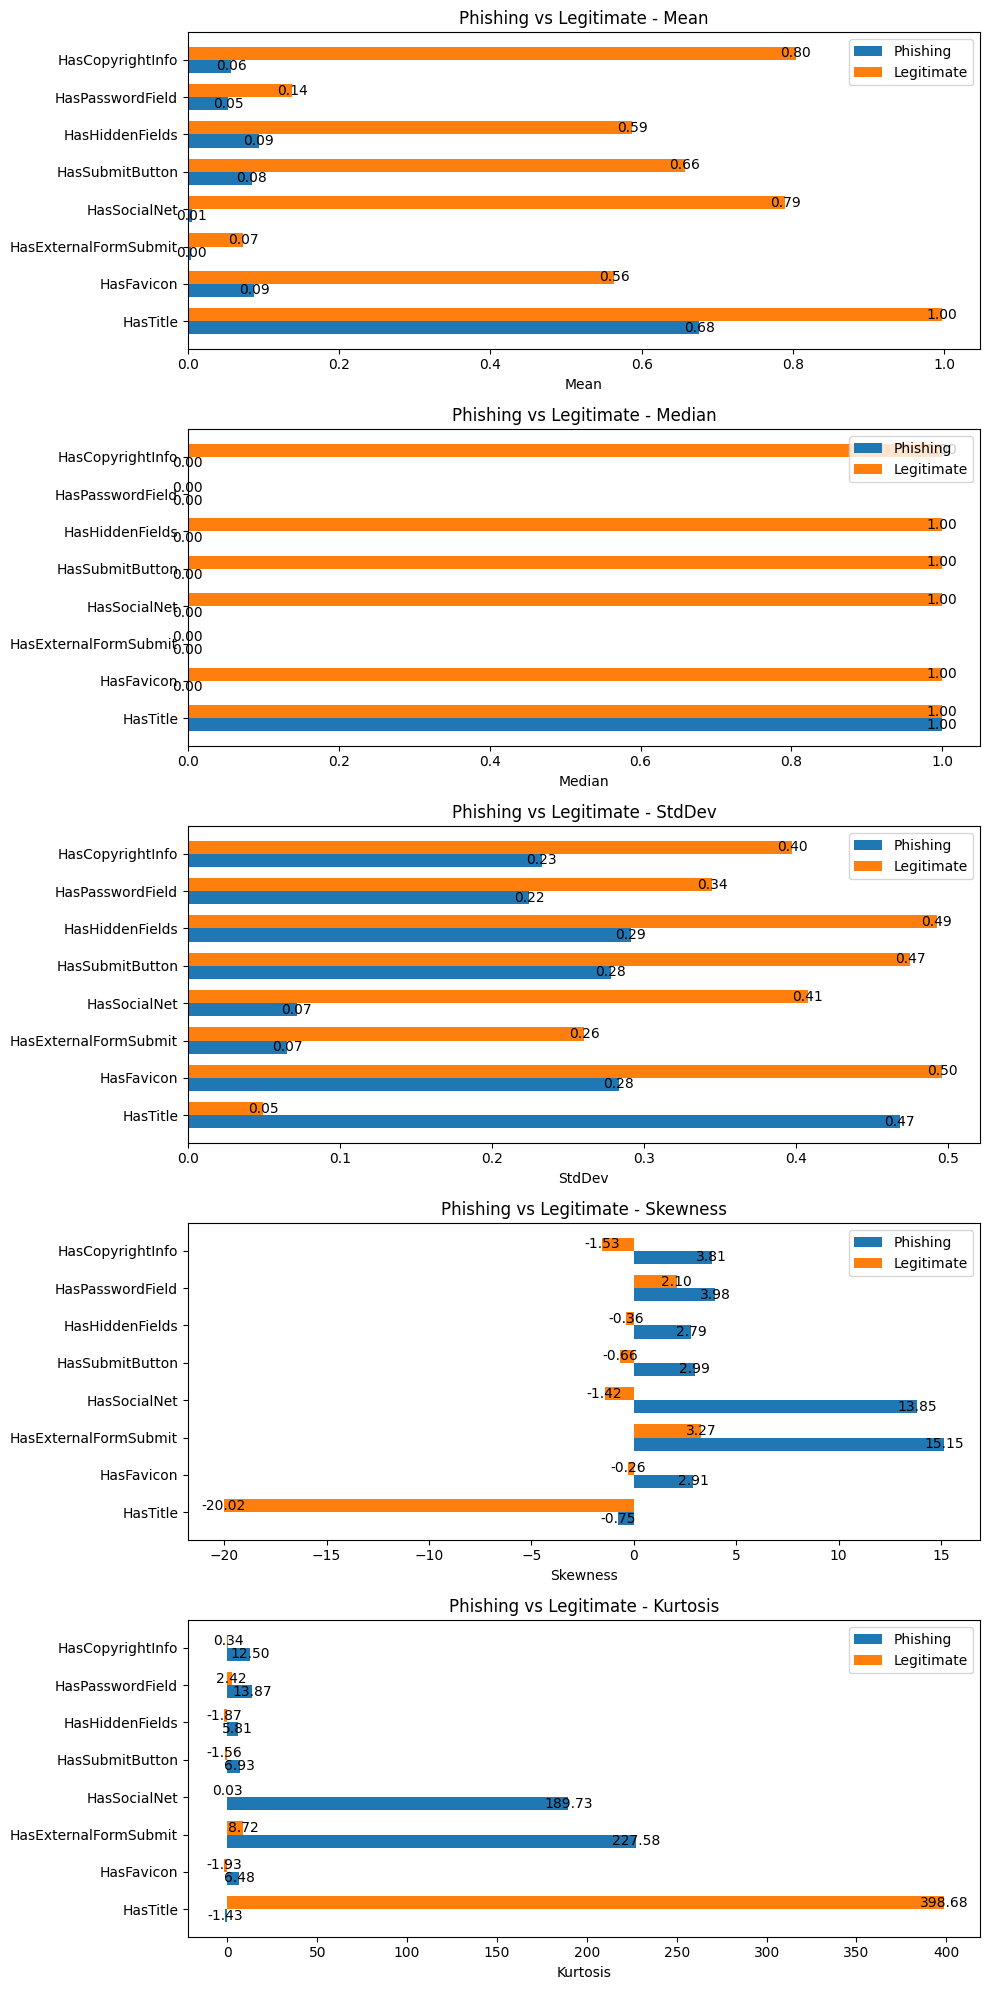

In [67]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

# Load the cleaned data
data = pd.read_csv('remaining_cleaned_urls.csv')

# Define the columns of interest and the label
columns_of_interest = ['HasTitle', 'HasFavicon', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 
                       'HasPasswordField', 'HasCopyrightInfo']
label_column = 'label'

# Separate the data into phishing (label == 0) and legitimate (label != 0) URLs
phishing_data = data[data[label_column] == 0]
legitimate_data = data[data[label_column] != 0]

# Function to calculate central moments
def calculate_central_moments(data, columns):
    moments = {}
    for column in columns:
        mean = data[column].mean()
        median = data[column].median()
        std_dev = data[column].std()
        skewness = skew(data[column])
        kurt = kurtosis(data[column])
        moments[column] = {
            'Mean': mean,
            'Median': median,
            'StdDev': std_dev,
            'Skewness': skewness,
            'Kurtosis': kurt
        }
    return moments

# Calculate central moments for phishing and legitimate data
phishing_moments = calculate_central_moments(phishing_data, columns_of_interest)
legitimate_moments = calculate_central_moments(legitimate_data, columns_of_interest)

# Create a DataFrame to display the results
moments_df = pd.DataFrame({
    'Phishing Mean': [phishing_moments[col]['Mean'] for col in columns_of_interest],
    'Phishing Median': [phishing_moments[col]['Median'] for col in columns_of_interest],
    'Phishing StdDev': [phishing_moments[col]['StdDev'] for col in columns_of_interest],
    'Phishing Skewness': [phishing_moments[col]['Skewness'] for col in columns_of_interest],
    'Phishing Kurtosis': [phishing_moments[col]['Kurtosis'] for col in columns_of_interest],
    'Legitimate Mean': [legitimate_moments[col]['Mean'] for col in columns_of_interest],
    'Legitimate Median': [legitimate_moments[col]['Median'] for col in columns_of_interest],
    'Legitimate StdDev': [legitimate_moments[col]['StdDev'] for col in columns_of_interest],
    'Legitimate Skewness': [legitimate_moments[col]['Skewness'] for col in columns_of_interest],
    'Legitimate Kurtosis': [legitimate_moments[col]['Kurtosis'] for col in columns_of_interest]
}, index=columns_of_interest)

display(moments_df)

# Visualization
attributes = columns_of_interest
moment_types = ['Mean', 'Median', 'StdDev', 'Skewness', 'Kurtosis']
bar_width = 0.35

# Plot each moment type in a stacked bar plot
fig, axes = plt.subplots(nrows=len(moment_types), ncols=1, figsize=(10, 20))

for i, moment in enumerate(moment_types):
    ax = axes[i]
    index = np.arange(len(attributes))
    phishing_values = moments_df[f'Phishing {moment}']
    legitimate_values = moments_df[f'Legitimate {moment}']

    bars1 = ax.barh(index - bar_width/2, phishing_values, bar_width, label='Phishing')
    bars2 = ax.barh(index + bar_width/2, legitimate_values, bar_width, label='Legitimate')

    ax.set_xlabel(moment)
    ax.set_title(f'Phishing vs Legitimate - {moment}')
    ax.set_yticks(index)
    ax.set_yticklabels(attributes)
    ax.legend()

    # Annotate bars with values
    for bar, value1, value2 in zip(index, phishing_values, legitimate_values):
        ax.text(value1, bar - bar_width/2, f'{value1:.2f}', ha='center', va='center', color='black')
        ax.text(value2, bar + bar_width/2, f'{value2:.2f}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()
